<a href="https://colab.research.google.com/github/matthewberry/uiuc_com_dsp/blob/master/DSP_personalized_medicine_data_synthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



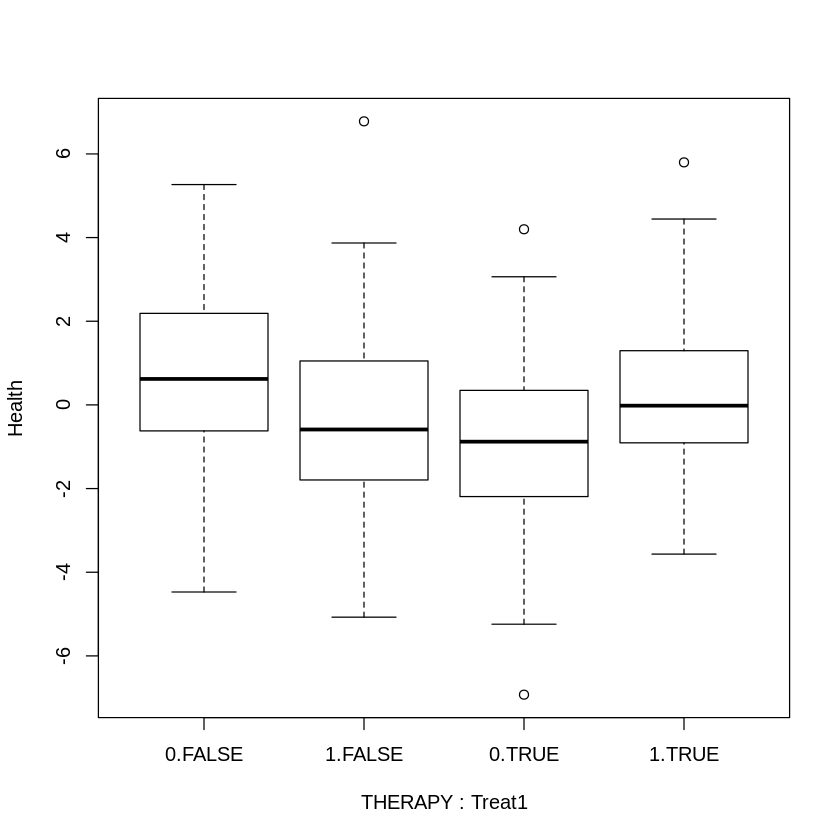

In [0]:
###################
# generate the data
###################

install.packages("aVirtualTwins", repos = "http://cran.rstudio.com/")
library(aVirtualTwins)

# load data sepsis
data(sepsis)
set.seed(1)
Treat1 = (sepsis$PRAPACHE < 26 & sepsis$AGE < 50) | (sepsis$PRAPACHE >= 26 & sepsis$BLGCS < 12)
n = nrow(sepsis)
THERAPY = rbinom(n, 1, 0.5)

Health = rnorm(n, 0.5, 2)*Treat1*(THERAPY == 1) + rnorm(n, -0.5, 2)*Treat1*(THERAPY == 0) + 
        rnorm(n, -0.5, 2)*(!Treat1)*(THERAPY == 1) + rnorm(n, 0.5, 2)*(!Treat1)*(THERAPY == 0)
  
boxplot(Health~ THERAPY + Treat1)
  
Sepsis = sepsis
colnames(Sepsis)[1] = "Health"
  
Sepsis$Health = Health
Sepsis$THERAPY = THERAPY
Sepsis$BEST = Treat1 + 0
write.csv(Sepsis, file="data/Sepsis.csv")